In [7]:
import pandas as pd
import albumentations as A
import skimage.io

from utils.dataset import RemovePenMarkAlbumentations
import torch
from torch.utils.data import DataLoader
from work.utils.dataset import PandasDataset
import matplotlib.pyplot as plt
import skimage

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
df = pd.DataFrame(data=[{"image_id": "c4b1a10db8b0cdece7a1498b2fcbda7f", "isup_grade": 1}])
df.head()

,image_id,isup_grade
0,c4b1a10db8b0cdece7a1498b2fcbda7f,1


In [9]:
transforms_train = A.Compose([
    RemovePenMarkAlbumentations(),
    # A.Transpose(p=0.5),
    # A.VerticalFlip(p=0.5),
    # A.HorizontalFlip(p=0.5),
])

In [10]:
dataset = PandasDataset("../dataset/tiles", df, transforms_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)

Removing marks...
Feature batch shape: torch.Size([1, 3, 1536, 1536])
Labels batch shape: torch.Size([1, 5])


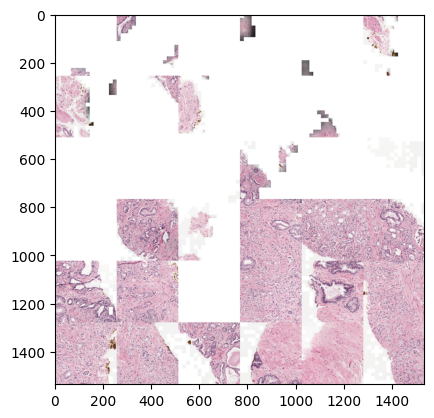

In [11]:
train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].permute(1, 2, 0).numpy()

Removing marks...


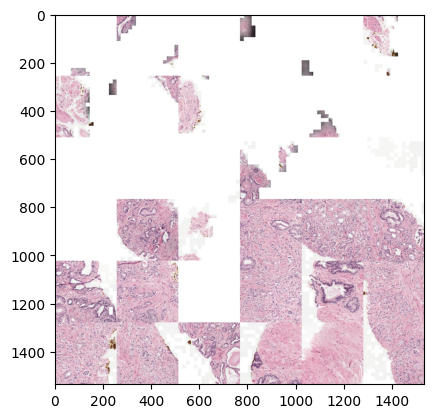

In [12]:
transform = RemovePenMarkAlbumentations()
image = skimage.io.imread("../dataset/tiles/c4b1a10db8b0cdece7a1498b2fcbda7f.jpg")

transformed_image = transform(image=image)
plt.imshow(transformed_image["image"])
